In [58]:
import numpy as np 

In [59]:
X = 2* np.random.rand(100 , 1)

In [60]:
y = 4+3*X+np.random.rand(100 , 1)

In [61]:
X_b = np.c_[np.ones((100 , 1 )) , X]

In [62]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [63]:
theta_best 

array([[4.55509106],
       [2.98205143]])

In [64]:
X_new = np.array([[0],[2]])


In [65]:
X_new_b = np.c_[np.ones((2,1)),X_new]

In [66]:
y_predict = X_new_b.dot(theta_best)

In [67]:
y_predict

array([[ 4.55509106],
       [10.51919393]])

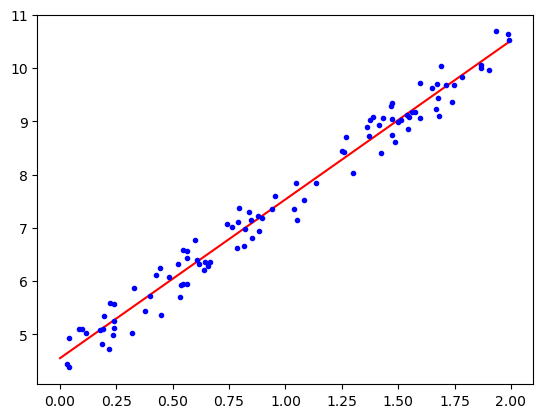

In [68]:
import matplotlib.pyplot as plt 
plt.plot(X_new , y_predict , "r-")
plt.plot(X,y,"b.")

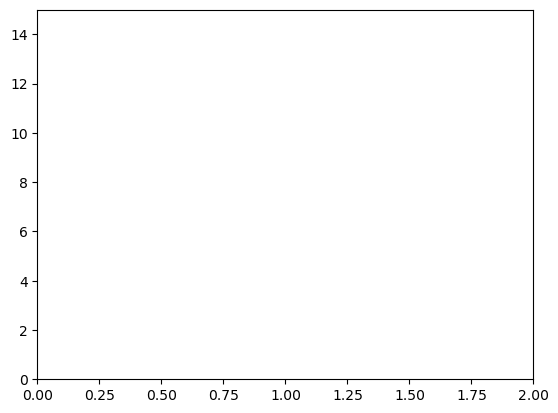

In [69]:
plt.axis([0,2,0,15])
plt.show()

In [70]:
from sklearn.linear_model import LinearRegression 

In [71]:
lin_reg = LinearRegression()

In [72]:
lin_reg.fit(X,y)

LinearRegression()

In [73]:
lin_reg.intercept_,lin_reg.coef_

(array([4.55509106]), array([[2.98205143]]))

In [74]:
lin_reg.predict(X_new)

array([[ 4.55509106],
       [10.51919393]])

In [75]:
theta_best_svd , residuals , rank , s = np.linalg.lstsq(X_b, y , rcond = 1e-6)                 

In [76]:
theta_best_svd

array([[4.55509106],
       [2.98205143]])

In [77]:
np.linalg.pinv(X_b).dot(y)

array([[4.55509106],
       [2.98205143]])

<h2>Gradient Implementation 

In [78]:
eta = 0.1
n_iteration = 1000 
m = 100 
theta = np.random.randn(2,1) # random Intialization 
for iteration in range ( n_iteration ):
    gradients= 2/m * X_b.T.dot(X_b.dot(theta) -  y )
    theta = theta - eta * gradients 


In [79]:
theta 

array([[4.55509106],
       [2.98205143]])

In [80]:
n_epochs = 50 


In [81]:
t0 , t1 = 5 , 50 #schedule parameters  
def learning_schedule(t):
   return t0/(t+t1)

In [82]:
theta = np.random.randn(2,1)

In [83]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients


In [84]:
theta


array([[4.54873618],
       [2.97792866]])

In [85]:
from sklearn.linear_model import SGDRegressor 
sgd_reg = SGDRegressor(max_iter= 1000 , tol = 1e-3 , penalty = None , eta0 = 0.1)
sgd_reg.fit (X , y.ravel())


SGDRegressor(eta0=0.1, penalty=None)

In [86]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.56939599]), array([3.01489887]))

In [87]:
m = 100 
x = 6*np.random.randn(m,1) - 3 
y = 0.5*X**2 + X+2+np.random.randn(m,1)

In [88]:
from sklearn.preprocessing import PolynomialFeatures 
poly_features = PolynomialFeatures(degree = 2 , include_bias =  False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.90245963])

In [89]:
X_poly[0]

array([1.90245963, 3.61935265])

In [90]:
lin_reg = LinearRegression()

In [91]:
lin_reg.fit(X_poly , y )

LinearRegression()

In [92]:
lin_reg.intercept_ , lin_reg.coef_

(array([1.83253931]), array([[1.39114345, 0.36449857]]))

In [93]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split 


In [94]:
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")


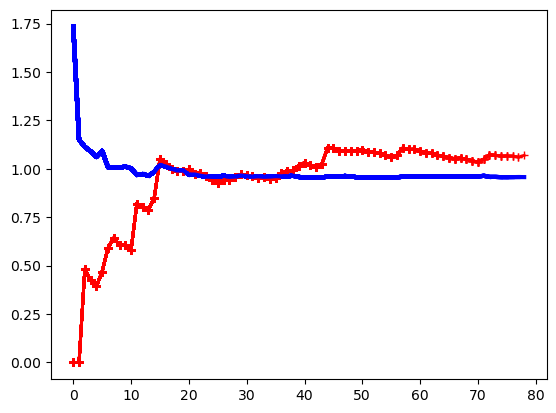

In [95]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg , X , y)

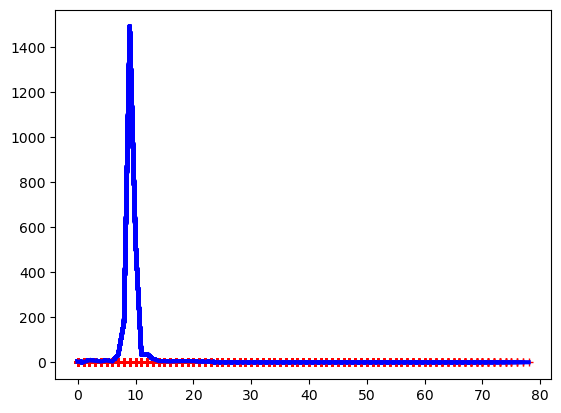

In [96]:
#now what we build 10 degree polynomial 
from sklearn.pipeline import Pipeline 
polynomial_regression = Pipeline([("poly_features" , PolynomialFeatures( degree = 10 , include_bias = False )) , ("lin_reg" , LinearRegression())])
plot_learning_curves(polynomial_regression , X , y )

In [97]:
 #ridge regresssion 
from sklearn.linear_model import Ridge 
ridge_reg = Ridge(alpha = 1 , solver = "cholesky")
ridge_reg.fit(X,y)


Ridge(alpha=1, solver='cholesky')

In [100]:
ridge_reg.predict([[1.5]])

array([[4.72903893]])

In [101]:
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X , y.ravel())
sgd_reg.predict([[1.5]])

array([4.73448067])

In [103]:
from sklearn.linear_model import Lasso 
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([4.60052401])